<a href="https://www.kaggle.com/code/larsmagnusson/itf31519-workshop-3-10-comparing-ensemble-methods?scriptVersionId=146798864" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# Load dataset
dataset = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

from sklearn.model_selection import train_test_split

# Split into training and test data (75/25)
train_X, test_X, train_y, test_y = train_test_split(dataset.drop('quality', axis=1), dataset['quality'])


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Create a dictionary with hyperparameter values we want to test
gb_param = {'learning_rate': [0.025, 0.05, 0.1, 0.15, 0.20], # The "size" of each boosting step
            'n_estimators': [50, 100, 150, 200]} # The number of gradient boosted trees to include in the ensemble

# Create an gridsearch object for finding the best hyperparameter values 
# for a gradient boosting classifier and fit (train) it on the training data
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_param)
gb_grid.fit(train_X, train_y)

# IMPORTANT: gb_grid will in addition to performing the grid search to find the 
# best values also retrain a model using the best found values. This is controlled 
# the refit parameter in GridSearchCV. gb_grid can be used to score and predict using
# the retrained model.

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.025, 0.05, 0.1, 0.15, 0.2],
                         'n_estimators': [50, 100, 150, 200]})

In [4]:
# Fetch cross-validation results into a pandas dataframe
gb_results = pd.DataFrame(gb_grid.cv_results_)
gb_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.786299,0.007424,0.003633,0.000072,0.025,50,"{'learning_rate': 0.025, 'n_estimators': 50}",0.604167,0.600000,0.608333,0.545833,0.606695,0.593006,0.023753,20
1,1.573889,0.020860,0.004740,0.000131,0.025,100,"{'learning_rate': 0.025, 'n_estimators': 100}",0.616667,0.654167,0.608333,0.579167,0.598326,0.611332,0.024803,16
2,2.362471,0.014656,0.006085,0.000347,0.025,150,"{'learning_rate': 0.025, 'n_estimators': 150}",0.595833,0.654167,0.600000,0.591667,0.610879,0.610509,0.022746,17
3,3.125848,0.016477,0.007139,0.000316,0.025,200,"{'learning_rate': 0.025, 'n_estimators': 200}",0.591667,0.666667,0.616667,0.583333,0.627615,0.617190,0.029511,15
4,0.798419,0.018325,0.003603,0.000074,0.05,50,"{'learning_rate': 0.05, 'n_estimators': 50}",0.608333,0.637500,0.608333,0.566667,0.602510,0.604669,0.022599,19
5,1.575691,0.020925,0.004930,0.000224,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.570833,0.637500,0.637500,0.570833,0.631799,0.609693,0.031797,18
6,2.368512,0.007334,0.005895,0.000122,0.05,150,"{'learning_rate': 0.05, 'n_estimators': 150}",0.612500,0.666667,0.625000,0.579167,0.615063,0.619679,0.028108,12
7,3.168894,0.018548,0.007106,0.000096,0.05,200,"{'learning_rate': 0.05, 'n_estimators': 200}",0.637500,0.683333,0.633333,0.566667,0.619247,0.628016,0.037467,9
8,0.790135,0.002829,0.003684,0.000092,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.600000,0.654167,0.620833,0.570833,0.648536,0.618874,0.030962,13
9,1.575282,0.004603,0.004772,0.000091,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.620833,0.658333,0.625000,0.600000,0.652720,0.631377,0.021534,8


In [5]:
# For debug purposes. These values will be our x values in the plot
gb_results['param_learning_rate']

0     0.025
1     0.025
2     0.025
3     0.025
4      0.05
5      0.05
6      0.05
7      0.05
8       0.1
9       0.1
10      0.1
11      0.1
12     0.15
13     0.15
14     0.15
15     0.15
16      0.2
17      0.2
18      0.2
19      0.2
Name: param_learning_rate, dtype: object

In [6]:
# For debug purposes. These values will be our y values in the plot
gb_results['mean_test_score']

0     0.593006
1     0.611332
2     0.610509
3     0.617190
4     0.604669
5     0.609693
6     0.619679
7     0.628016
8     0.618874
9     0.631377
10    0.637221
11    0.637211
12    0.617999
13    0.628009
14    0.642204
15    0.640523
16    0.627207
17    0.636370
18    0.648047
19    0.638037
Name: mean_test_score, dtype: float64

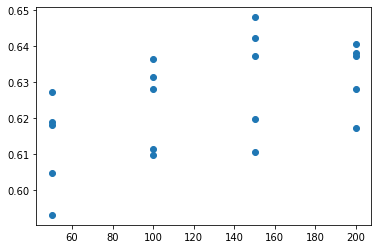

In [7]:
import matplotlib.pyplot as plt

# Plot the values directly
plt.scatter(gb_results['param_n_estimators'], gb_results['mean_test_score'])

In [8]:
# Find the average score for each value of the learning_rate and n_estimators hyperparameters. We 
# have four results (the number of n_estimator values) for each learning rate. Note that we could 
# potentially select the best score (instead of the mean) for each value as well. 
gb_mean_test_scores = np.array(gb_results['mean_test_score']).reshape(-1,4)
# The learning rate means are calculated along the columns
gb_learning_rate_means = np.mean(gb_mean_test_scores, axis=1)
# The learning rate means are calculated along the rows
gb_n_estimator_means = np.mean(gb_mean_test_scores, axis=0)
print(gb_n_estimator_means)
print(gb_learning_rate_means)

# Find the x values directly from the param values. Could be fetched from the 
# cv_results as well
x_n_estimators = gb_param['n_estimators']
x_learning_rate = gb_param['learning_rate']


[0.61235077 0.62335635 0.63153208 0.63219526]
[0.60800907 0.6155143  0.63117068 0.63218358 0.63741545]


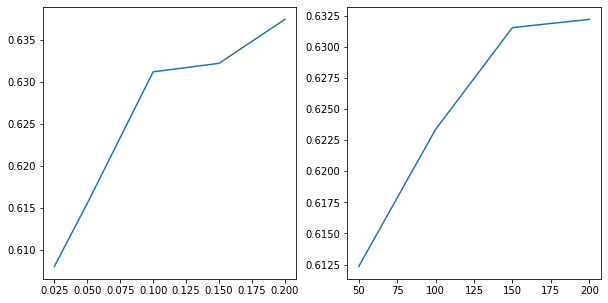

In [9]:
# Plot the average performance for each n_estimator and learning_rate value tested
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x_learning_rate, gb_learning_rate_means)
ax[1].plot(x_n_estimators, gb_n_estimator_means)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary with hyperparameter values we want to test
rf_param = {'max_depth': [4, 6, 8, 10, 12],      # The maximum depth of each decision tree
            'n_estimators': [50, 100, 150, 200]} # The number of decision trees to include in the ensemble

# Create an gridsearch object for finding the best hyperparameter values 
# for a gradient boosting classifier and fit (train) it on the training data
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param)
rf_grid.fit(train_X, train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150, 200]})

In [11]:
# Convert the results from the cross validated grid search into a dataframe 
rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094868,0.001764,0.008440,0.000411,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.604167,0.591667,0.645833,0.575000,0.615063,0.606346,0.023825,17
1,0.188394,0.003575,0.015026,0.000618,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.608333,0.583333,0.616667,0.579167,0.602510,0.598002,0.014459,20
2,0.275175,0.002580,0.020211,0.000488,4,150,"{'max_depth': 4, 'n_estimators': 150}",0.612500,0.591667,0.633333,0.570833,0.619247,0.605516,0.021935,18
3,0.365872,0.003262,0.026267,0.000633,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.612500,0.570833,0.625000,0.587500,0.610879,0.601342,0.019481,19
4,0.106083,0.001119,0.008732,0.000276,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.608333,0.629167,0.645833,0.566667,0.648536,0.619707,0.030152,16
5,0.215091,0.009118,0.015288,0.000392,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.620833,0.629167,0.658333,0.562500,0.648536,0.623874,0.033465,14
6,0.313012,0.002521,0.021259,0.000307,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.620833,0.641667,0.641667,0.583333,0.631799,0.623860,0.021674,15
7,0.412643,0.000654,0.027478,0.000233,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.620833,0.650000,0.641667,0.583333,0.656904,0.630547,0.026534,13
8,0.117357,0.000987,0.009012,0.000404,8,50,"{'max_depth': 8, 'n_estimators': 50}",0.641667,0.662500,0.654167,0.595833,0.661088,0.643051,0.024733,10
9,0.230015,0.000889,0.015680,0.000157,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.625000,0.658333,0.666667,0.575000,0.665272,0.638054,0.034977,12


[[0.60634589 0.59800209 0.60551604 0.6013424 ]
 [0.61970711 0.62387378 0.62385983 0.63054742]
 [0.64305091 0.63805439 0.64473501 0.63972455]
 [0.64890167 0.65306137 0.65389819 0.66306834]
 [0.65724198 0.6655788  0.66141911 0.67144003]]


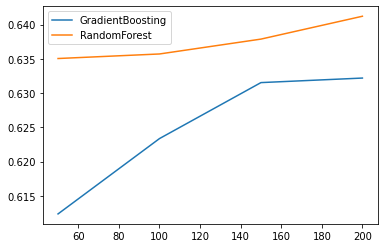

In [12]:
# Find the average for each value of the hyperparameter values. We 
# have several results for each learning rate, so we need to combine them. We'll be using the mean,
# but other methods could illustrate the results more accurately e.g. max
rf_mean_test_scores = np.array(rf_results['mean_test_score']).reshape(-1,4)
print(rf_mean_test_scores)
rf_max_depth_means = np.mean(rf_mean_test_scores, axis=1)
rf_n_estimators_means = np.mean(rf_mean_test_scores, axis=0)

# We'll use the same x axis points from the gb model since we've tested the same values for n_estimators
plt.plot(x_n_estimators, gb_n_estimator_means, label="GradientBoosting")
plt.plot(x_n_estimators, rf_n_estimators_means, label="RandomForest")
plt.legend()
plt.show()

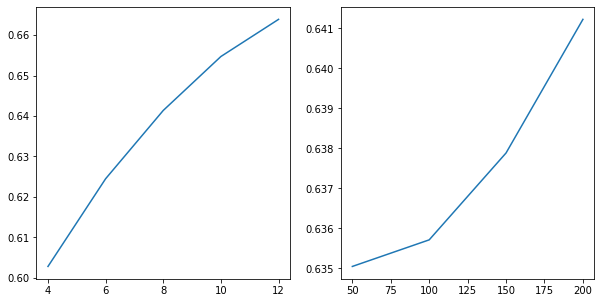

In [13]:
x_max_depth = rf_param['max_depth']
# Plot the average performance for each n_estimator and max_depth value tested
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x_max_depth, rf_max_depth_means)
ax[1].plot(x_n_estimators, rf_n_estimators_means)

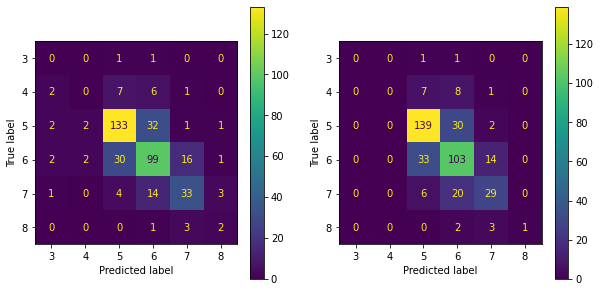

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Show confusion matrices for the gradient boosting and random forest
fig,ax = plt.subplots(1,2,figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(gb_grid, test_X, test_y, ax=ax[0])
ConfusionMatrixDisplay.from_estimator(rf_grid, test_X, test_y, ax=ax[1])

In [15]:
from statsmodels.stats.contingency_tables import mcnemar
from mlxtend.evaluate import mcnemar_table

# Random forest is performing better than gradient boosting. Let's verify this 
# using statistical tests (mcnemar). This works better (more intuitive) for binary classification,
# but can be utilized for multiclass problems as well. The results show that the improvement is 
# incidental i.e. not an actual improvement (p-value should be smaller than 0.05 [at least])

gb_pred = gb_grid.predict(test_X)
rf_pred = rf_grid.predict(test_X)

contingency = mcnemar_table(test_y, gb_pred, rf_pred)
print(contingency)
print(mcnemar(contingency))

[[235  32]
 [ 37  96]]
pvalue      0.6304564917867981
statistic   32.0
